In [ ]:
!pip install networkx

In [1]:
import networkx as nx

In [43]:
def girvan_newman_community_detection(graph):
    initial_components = nx.number_connected_components(graph)

    while nx.number_connected_components(graph) <= initial_components:
        edge_betweenness = nx.edge_betweenness_centrality(graph)
        max_betweenness_edge = max(edge_betweenness, key=edge_betweenness.get)

        graph.remove_edge(*max_betweenness_edge)

    communities = list(nx.connected_components(graph))
    for idx, comm in enumerate(communities):
        print(f"Community {idx + 1}: {comm}")
    return communities

In [21]:
!pip install python-louvain

In [44]:
import community.community_louvain as community_louvain

def louvain_community_detection(graph):

    graph = graph.to_undirected()

    partition = community_louvain.best_partition(graph)

    communities = {}
    for node, community_id in partition.items():
        if community_id not in communities:
            communities[community_id] = [node]
        else:
            communities[community_id].append(node)

    for community_id, nodes in communities.items():
        print(f"Community {community_id + 1}: {nodes}")
    return communities

In [45]:
import random

def label_propagation(graph):
    labels = {node: node for node in graph.nodes()}
    is_stable = False

    while not is_stable:
        is_stable = True
        nodes = list(graph.nodes())
        random.shuffle(nodes)  # Shuffle node order for better convergence

        for node in nodes:
            neighbors = list(graph.neighbors(node))
            if not neighbors:
                continue

            neighbor_labels = [labels[neighbor] for neighbor in neighbors]
            most_common_label = max(set(neighbor_labels), key=neighbor_labels.count)

            if labels[node] != most_common_label:
                labels[node] = most_common_label
                is_stable = False

    return labels

In [50]:
G = nx.karate_club_graph()
for node,childs in G.adj.items():
  for child,wt in childs.items():
    print(f"{node} -> {child} with weight {wt['weight']} ")

0 -> 1 with weight 4 
0 -> 2 with weight 5 
0 -> 3 with weight 3 
0 -> 4 with weight 3 
0 -> 5 with weight 3 
0 -> 6 with weight 3 
0 -> 7 with weight 2 
0 -> 8 with weight 2 
0 -> 10 with weight 2 
0 -> 11 with weight 3 
0 -> 12 with weight 1 
0 -> 13 with weight 3 
0 -> 17 with weight 2 
0 -> 19 with weight 2 
0 -> 21 with weight 2 
0 -> 31 with weight 2 
1 -> 0 with weight 4 
1 -> 2 with weight 6 
1 -> 3 with weight 3 
1 -> 7 with weight 4 
1 -> 13 with weight 5 
1 -> 17 with weight 1 
1 -> 19 with weight 2 
1 -> 21 with weight 2 
1 -> 30 with weight 2 
2 -> 0 with weight 5 
2 -> 1 with weight 6 
2 -> 3 with weight 3 
2 -> 7 with weight 4 
2 -> 8 with weight 5 
2 -> 9 with weight 1 
2 -> 13 with weight 3 
2 -> 27 with weight 2 
2 -> 28 with weight 2 
2 -> 32 with weight 2 
3 -> 0 with weight 3 
3 -> 1 with weight 3 
3 -> 2 with weight 3 
3 -> 7 with weight 3 
3 -> 12 with weight 3 
3 -> 13 with weight 3 
4 -> 0 with weight 3 
4 -> 6 with weight 2 
4 -> 10 with weight 3 
5 -> 0 with 

In [51]:
results1  = girvan_newman_community_detection(G)
print(results1)


Community 1: {0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}
Community 2: {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}
[{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]


In [52]:
results2 = louvain_community_detection(G)
print(results2)

Community 1: [0, 1, 3, 7, 11, 12, 13, 17, 19, 21]
Community 2: [2, 8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 28, 29, 30, 32, 33]
Community 3: [4, 5, 6, 10, 16]
Community 4: [24, 25, 31]
{0: [0, 1, 3, 7, 11, 12, 13, 17, 19, 21], 1: [2, 8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 28, 29, 30, 32, 33], 2: [4, 5, 6, 10, 16], 3: [24, 25, 31]}


In [53]:
result3 = label_propagation(G)
print(result3)

{0: 0, 1: 0, 2: 32, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 32, 9: 32, 10: 0, 11: 0, 12: 0, 13: 0, 14: 32, 15: 32, 16: 0, 17: 0, 18: 32, 19: 0, 20: 32, 21: 0, 22: 32, 23: 32, 24: 32, 25: 32, 26: 32, 27: 32, 28: 32, 29: 32, 30: 32, 31: 32, 32: 32, 33: 32}


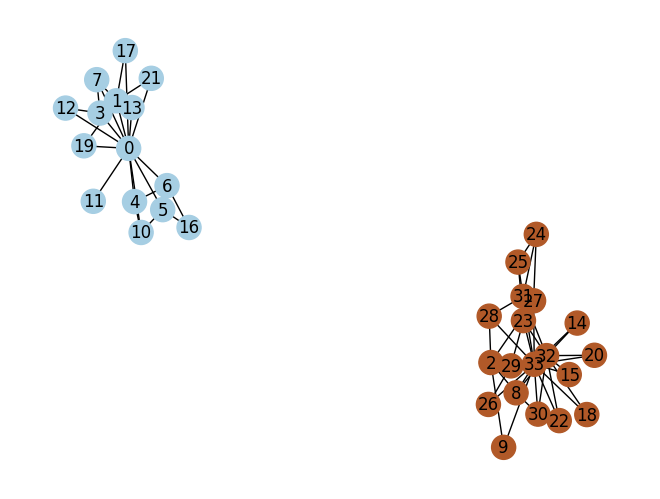

In [54]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(G)
colors = [result3[node] for node in G.nodes()]
nx.draw(G, pos, node_color=colors, with_labels=True, cmap=plt.cm.Paired)
plt.show()